In [12]:
#Cormac O Connor (20227426), Sophia Keady (20231555), Leon Cullen (20274815)
#Code excutes perfectly
#Resource of the implementation "https://www.kaggle.com/code/vortexkol/alexnet-cnn-architecture-on-tensorflow-beginner"



# Imports all the nessesary libaries and modules
# Tensorflow is is a widely used libary for machine learning
#



import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, Flatten, MaxPooling2D, Dropout
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.layers import BatchNormalization
# StratifiedKFold - a cross-validator from scikit-learn that provides train/test indices to split data in train/test sets
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical

import matplotlib.pyplot as plt
# Matplotlib's pyplot: a plotting library used for creating static, interactive, and animated visualizations in Python.
# We use matplotlib for graphing results and data

import numpy as np
# NumPy is a fundamental package for scientific computing with Python. It's used for working with arrays and matrices.


In [13]:
# Load the dataset
(train_images, train_labels), (test_images, test_labels) = cifar10.load_data()

# Normalize pixel values
train_images, test_images = train_images / 255.0, test_images / 255.0

# One-hot encode labels
train_labels = train_labels.reshape(-1,)
train_labels = to_categorical(train_labels)
test_labels = to_categorical(test_labels)

# Set amount of folds
n_folds = 5
skf = StratifiedKFold(n_splits=n_folds, shuffle=True, random_state=42)


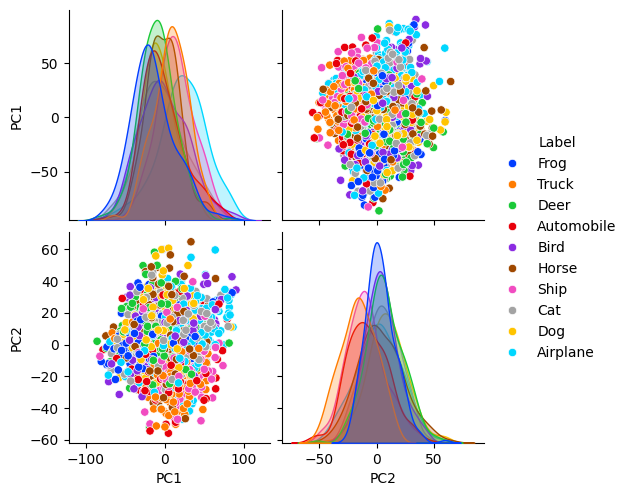

In [14]:
# To create a pairplot for the CIFAR-10 dataset, we first need to load the dataset, preprocess it, and then use seaborn to plot.
# Since the CIFAR-10 images are 32x32x3, we need to reduce the dimensionality to be able to create a pairplot.
# We used PCA for dimensionality reduction to transform the data into a format suitable for pairplot.

#Nessesary imports

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from keras.datasets import cifar10

# Load CIFAR-10 data
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# As this is just a demonstration of the dataset we only use a segment of the dataset to graph.
x_train_subset = x_train[:2000]
y_train_subset = y_train[:2000].flatten()

# Reshape the image data to 2D array (number of images, number of pixels)
x_train_reshaped = x_train_subset.reshape(x_train_subset.shape[0], -1)

# Standardize the data
scaler = StandardScaler()
x_train_standardized = scaler.fit_transform(x_train_reshaped)

# Apply PCA to reduce the data to 2 principal components for the pairplot
pca = PCA(n_components=2)
principal_components = pca.fit_transform(x_train_standardized)

# Create a DataFrame with PCA results and the corresponding labels
import pandas as pd
#Structuring the dataset into a Dataframe for displaying
pca_df = pd.DataFrame(data = principal_components, columns = ['PC1', 'PC2'])
pca_df['Label'] = y_train_subset
#Swapping the labels for then actual values
class_names = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
}

pca_df['Label'] = pca_df['Label'].map(class_names)
# Make pairplot using seaborn
sns.pairplot(pca_df, hue='Label', palette='bright')

#Outputs the plot
plt.show()


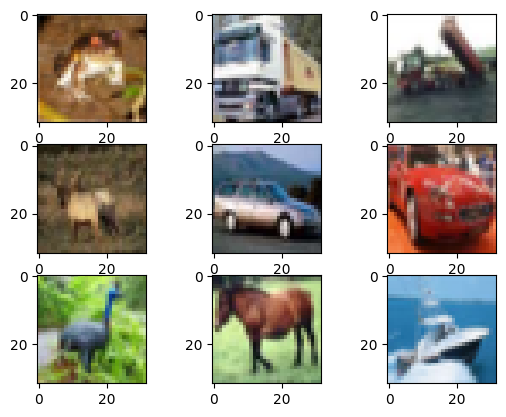

In [15]:
# Plot first few images to visualise the dataset simply prints the first 9 images
for i in range(9):
    plt.subplot(330 + 1 + i)
    plt.imshow(train_images[i])
plt.show()


In [16]:

def create_model():
    
    model = Sequential()

    # First Convolutional Layer
    # Adding a 2D convolution layer with 96 filters, a 3x3 kernel, ReLU activation, and 'same' padding.
    # Batch normalization normalizes the activations in the previous layer
    model.add(Conv2D(96, (3, 3), activation='relu', input_shape=(32, 32, 3), padding='same'))
    model.add(BatchNormalization())
    model.add(BatchNormalization())
    # Adding a max pooling layer with a 2x2 window to reduce spatial dimensions.
    model.add(MaxPooling2D((2, 2)))

    # Second Convolutional Layer
    # Added a 2D convolution layer with 256 filters, a 3x3 kernel, ReLU activation, and 'same' padding
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    # Adding a max pooling layer with a 2x2 window to reduce spatial dimensions.
    model.add(MaxPooling2D((2, 2)))

    # Third Convolutional Layer
    # Adding a 2D convolution layer with 384 filters, a 3x3 kernel, ReLU activation, and 'same' padding
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Fourth Convolutional Layer
    # Adding a 2D convolution layer with 384 filters, a 3x3 kernel, ReLU activation, and 'same' padding
    model.add(Conv2D(384, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())

    # Fifth Convolutional Layer
    # Adding a 2D convolution layer with 384 filters, a 3x3 kernel, ReLU activation, and 'same' padding
    model.add(Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    # Adding a max pooling layer with a 2x2 window to reduce spatial dimensions.
    model.add(MaxPooling2D((2, 2)))

    # Flattening and Fully Connected Layers
    # Here we flatten the output from convolutional layers to then feed to dense layers
    model.add(Flatten())
    # Adding a dense layer with 4096 units and ReLU activation.
    model.add(Dense(4096, activation='relu'))
    # Added dropout for regularization to reduce overfitting, dropping halfve of the units.
    model.add(Dropout(0.5))
    # Adding a dense layer with 4096 units and ReLU activation.
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    # Output Layer
    model.add(Dense(10, activation='softmax'))

    return model

#Here we call the function we just made and display a summary of the model
Model1 = create_model()  
Model1.summary()    




Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_15 (Conv2D)          (None, 32, 32, 96)        2688      
                                                                 
 batch_normalization_18 (Bat  (None, 32, 32, 96)       384       
 chNormalization)                                                
                                                                 
 batch_normalization_19 (Bat  (None, 32, 32, 96)       384       
 chNormalization)                                                
                                                                 
 max_pooling2d_9 (MaxPooling  (None, 16, 16, 96)       0         
 2D)                                                             
                                                                 
 conv2d_16 (Conv2D)          (None, 16, 16, 256)       221440    
                                                      

In [17]:

# Here we compile the model using the adam, categorical_crossentropy and accuracy
# Adam is a standard optimizer it works well and is known for being effective and efficient
# categorical_crossentropy is normally used in multiclassfication CNNs
# 

Model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [18]:
# The actual training process of the model repeatablely trains the model on the training data and checks its accuracy against
# the validation dataset.

history = Model1.fit(train_images, train_labels, epochs=19, validation_data=(test_images, test_labels))

Epoch 1/19
1563/1563 [==============================] - 33s 17ms/step - loss: 1.8978 - accuracy: 0.4030 - val_loss: 1.6073 - val_accuracy: 0.4156
Epoch 2/19
1563/1563 [==============================] - 26s 17ms/step - loss: 1.3024 - accuracy: 0.5618 - val_loss: 1.2981 - val_accuracy: 0.5594
Epoch 3/19
1563/1563 [==============================] - 27s 17ms/step - loss: 1.0107 - accuracy: 0.6657 - val_loss: 1.5078 - val_accuracy: 0.5058
Epoch 4/19
1563/1563 [==============================] - 27s 17ms/step - loss: 0.7931 - accuracy: 0.7366 - val_loss: 0.8629 - val_accuracy: 0.7211
Epoch 5/19
1563/1563 [==============================] - 27s 17ms/step - loss: 0.6385 - accuracy: 0.7879 - val_loss: 1.0316 - val_accuracy: 0.6634
Epoch 6/19
1563/1563 [==============================] - 27s 17ms/step - loss: 0.5263 - accuracy: 0.8270 - val_loss: 0.7205 - val_accuracy: 0.7645
Epoch 7/19
1563/1563 [==============================] - 27s 17ms/step - loss: 0.4360 - accuracy: 0.8558 - val_loss: 0.8220 -

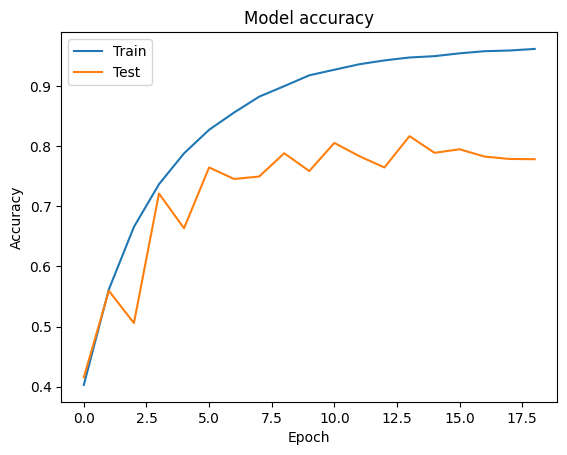

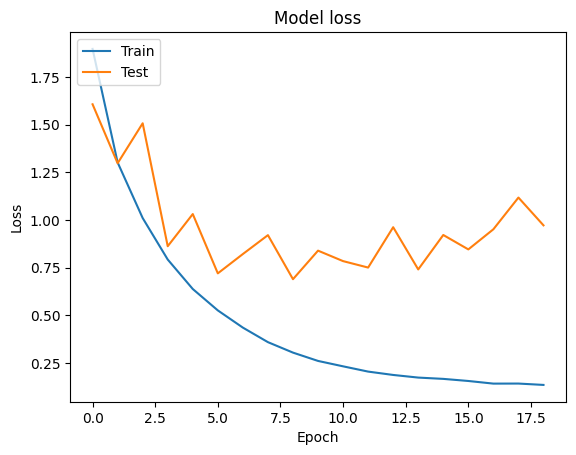

In [19]:
# Plot training & validation accuracy values
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.show()

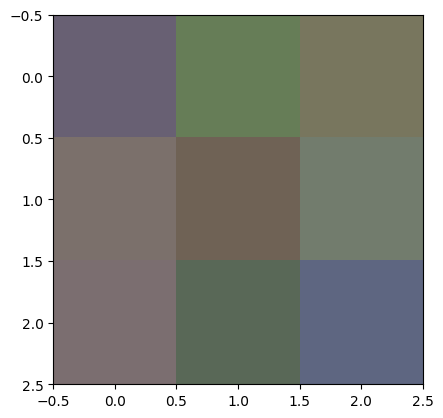

In [20]:
weights = Model1.layers[0].get_weights()[0]  # Adjust the index for the desired layer

# Normalize the weights
weights_min = weights.min()
weights_max = weights.max()
weights = (weights - weights_min) / (weights_max - weights_min)

plt.imshow(weights[:, :, :, 0].squeeze(), cmap='gray')  # Adjust indices for specific filters
plt.show()



313/313 [==============================] - 1s 3ms/step


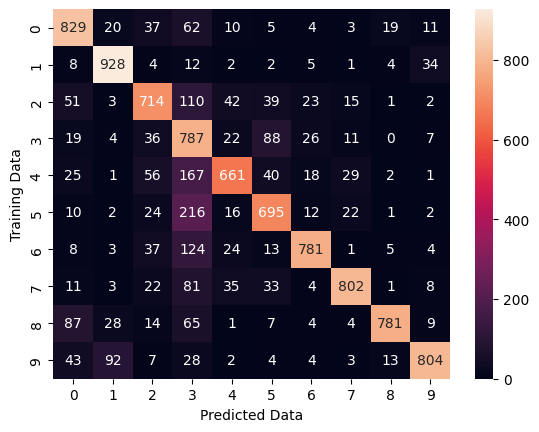

array([[829,  20,  37,  62,  10,   5,   4,   3,  19,  11],
       [  8, 928,   4,  12,   2,   2,   5,   1,   4,  34],
       [ 51,   3, 714, 110,  42,  39,  23,  15,   1,   2],
       [ 19,   4,  36, 787,  22,  88,  26,  11,   0,   7],
       [ 25,   1,  56, 167, 661,  40,  18,  29,   2,   1],
       [ 10,   2,  24, 216,  16, 695,  12,  22,   1,   2],
       [  8,   3,  37, 124,  24,  13, 781,   1,   5,   4],
       [ 11,   3,  22,  81,  35,  33,   4, 802,   1,   8],
       [ 87,  28,  14,  65,   1,   7,   4,   4, 781,   9],
       [ 43,  92,   7,  28,   2,   4,   4,   3,  13, 804]], dtype=int64)

In [21]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from tensorflow.keras.utils import to_categorical

# Make predictions assign it to a variable 
predicted_probabilities = Model1.predict(test_images)
predictions = np.argmax(predicted_probabilities, axis=1)


# Convert one-hot encoded test_labels back to label form if necessary
if test_labels.ndim > 1:
    test_labels_decoded = np.argmax(test_labels, axis=1)
else:
    test_labels_decoded = test_labels

# Assuming 'predictions' are your model predictions
class_names = {
    0: 'Airplane',
    1: 'Automobile',
    2: 'Bird',
    3: 'Cat',
    4: 'Deer',
    5: 'Dog',
    6: 'Frog',
    7: 'Horse',
    8: 'Ship',
    9: 'Truck'
}

# Generate the confusion matrix
cm = confusion_matrix(test_labels_decoded, predictions)

# Visualize the confusion matrix using a heatmap
sns.heatmap(cm, annot=True, fmt='g')
plt.xlabel('Predicted Data')
plt.ylabel('Training Data')
plt.show()
# Prints the confusion matrix
confusion_matrix(test_labels_decoded, predictions)


In [22]:
from tensorflow.keras.models import load_model

scores = []
#splitting the dataset into k-folds
for train_index, test_index in skf.split(train_images, np.argmax(train_labels, axis=1)):
    #seperating it into training and validation sets
    _, X_val_fold = train_images[train_index], train_images[test_index]
    _, y_val_fold = train_labels[train_index], train_labels[test_index]

    # Load the saved model
    model1 = load_model('alexnet_cifar10.h5')

    # Evaluate the model
    score = model1.evaluate(X_val_fold, y_val_fold, verbose=0)
    #store the evaluation score
    scores.append(score)
# Calculate and print the average score across all folds
average_score = np.mean(scores, axis=0)
print(f'Average score across all folds: {average_score}')


Average score across all folds: [0.12330875 0.96456   ]


In [23]:
from sklearn.model_selection import StratifiedKFold
from tensorflow.keras.utils import to_categorical
import numpy as np

# Initialize StratifiedKFold
kfold = StratifiedKFold(n_splits=5, shuffle=True)

cvscores = []
histories = []

# Iterate over each fold

for train_index, test_index in kfold.split(train_images, np.argmax(train_labels, axis=1)):
    # Split the dataset into training and testing sets for the current fold
    X_train_fold, X_test_fold = train_images[train_index], train_images[test_index]
    y_train_fold, y_test_fold = train_labels[train_index], train_labels[test_index]

    # Verify the shape of the labels
    print("Original y_train_fold shape:", y_train_fold.shape)
    print("Original y_test_fold shape:", y_test_fold.shape)

    # Ensure labels are 1D
    if y_train_fold.ndim > 1:
        y_train_fold = np.argmax(y_train_fold, axis=1)
    if y_test_fold.ndim > 1:
        y_test_fold = np.argmax(y_test_fold, axis=1)

    # One-hot encode the labels
    y_train_fold_enc = to_categorical(y_train_fold, num_classes=10)
    y_test_fold_enc = to_categorical(y_test_fold, num_classes=10)

    # Check the shape after encoding
    print("Encoded y_train_fold shape:", y_train_fold_enc.shape)
    print("Encoded y_test_fold shape:", y_test_fold_enc.shape)


    # Load your pre-trained model (ensure it's loaded outside the loop)
    model1 = load_model('alexnet_cifar10.h5')  # Replace with your model's file name

    # Compile and train the model (or directly evaluate if the model is already trained)
    model1.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    history = model1.fit(X_train_fold, y_train_fold_enc, epochs=2, validation_data=(X_test_fold, y_test_fold_enc))
    scores = model1.evaluate(X_test_fold, y_test_fold_enc, verbose=0)

    histories.append(history)
    cvscores.append(scores[1] * 100)

    # Print the score for the current fold
    print(f'Score for fold {len(cvscores)}: {scores[1] * 100}%')

# After all folds

average_score = np.mean(cvscores)
print(f'Average score across all folds: {average_score}%')
print("Shape of y_train_fold_enc:", y_train_fold_enc.shape)
print("Shape of y_test_fold_enc:", y_test_fold_enc.shape)


Original y_train_fold shape: (40000, 10)
Original y_test_fold shape: (10000, 10)
Encoded y_train_fold shape: (40000, 10)
Encoded y_test_fold shape: (10000, 10)
Epoch 1/2
1250/1250 [==============================] - 21s 17ms/step - loss: 0.1610 - accuracy: 0.9589 - val_loss: 0.1848 - val_accuracy: 0.9473
Epoch 2/2
1250/1250 [==============================] - 20s 16ms/step - loss: 0.1328 - accuracy: 0.9650 - val_loss: 0.1398 - val_accuracy: 0.9533
Score for fold 1: 95.32999992370605%
Original y_train_fold shape: (40000, 10)
Original y_test_fold shape: (10000, 10)
Encoded y_train_fold shape: (40000, 10)
Encoded y_test_fold shape: (10000, 10)
Epoch 1/2
1250/1250 [==============================] - 21s 17ms/step - loss: 0.1587 - accuracy: 0.9600 - val_loss: 0.1198 - val_accuracy: 0.9645
Epoch 2/2
1250/1250 [==============================] - 20s 16ms/step - loss: 0.1412 - accuracy: 0.9643 - val_loss: 0.1923 - val_accuracy: 0.9440
Score for fold 2: 94.40000057220459%
Original y_train_fold shap

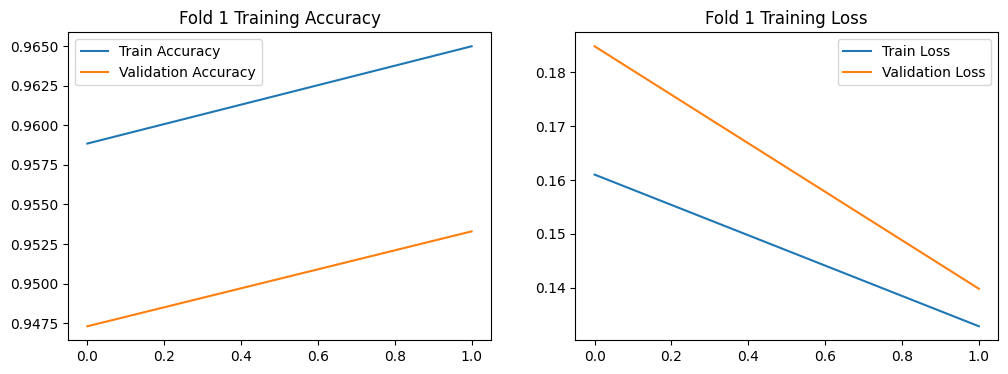

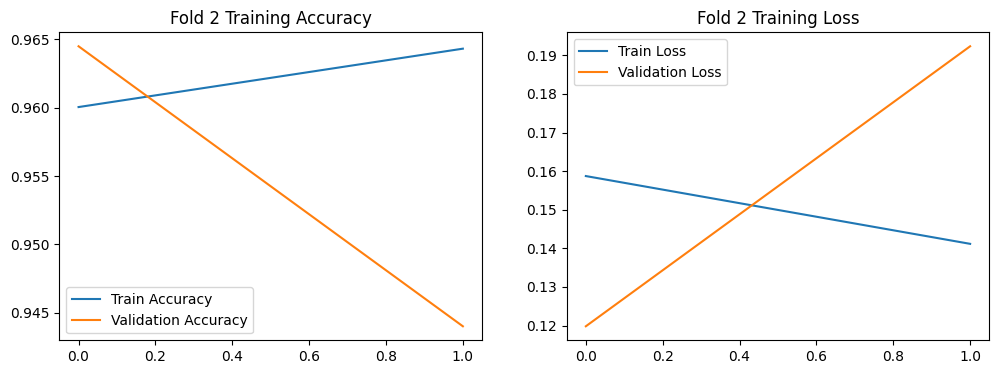

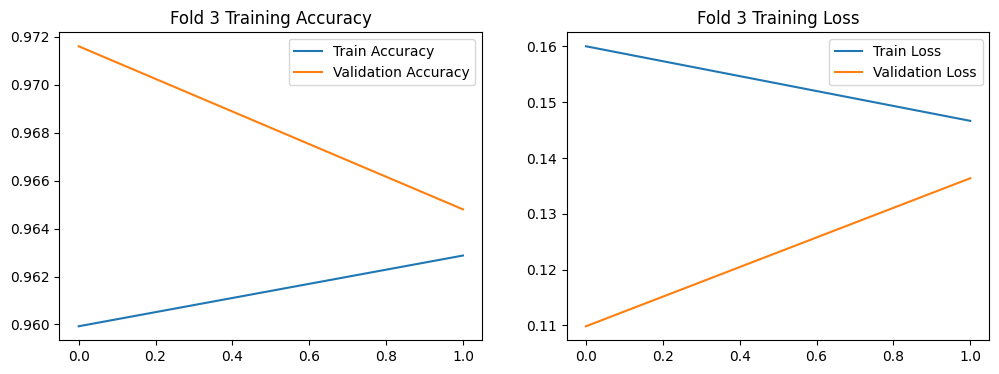

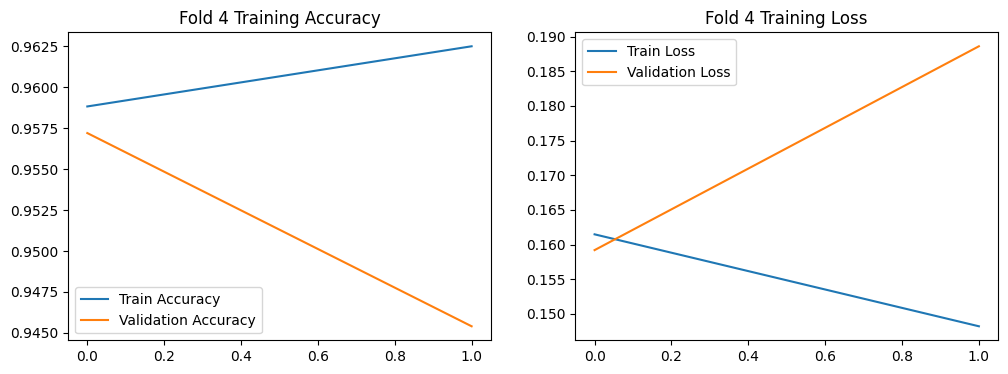

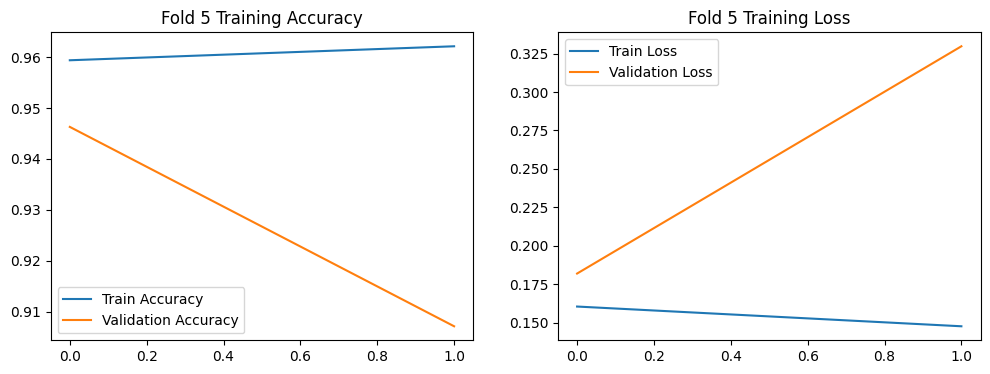

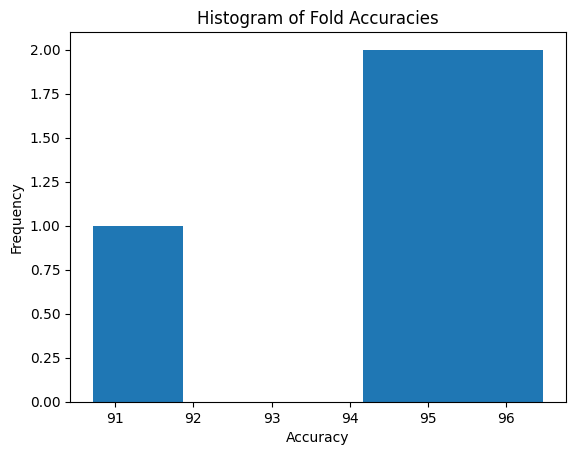

In [24]:
# For loop that prints all the folds training accuracys and training loss as 2 seperate graphs
for i, history in enumerate(histories):
    plt.figure(figsize=(12, 4))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'], label='Train Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title(f'Fold {i+1} Training Accuracy')
    plt.legend()

    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'], label='Train Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.title(f'Fold {i+1} Training Loss')
    plt.legend()
    plt.show()

# Plot histogram of fold accuracies
plt.hist(cvscores, bins=5)
plt.title('Histogram of Fold Accuracies')
plt.xlabel('Accuracy')
plt.ylabel('Frequency')
plt.show()

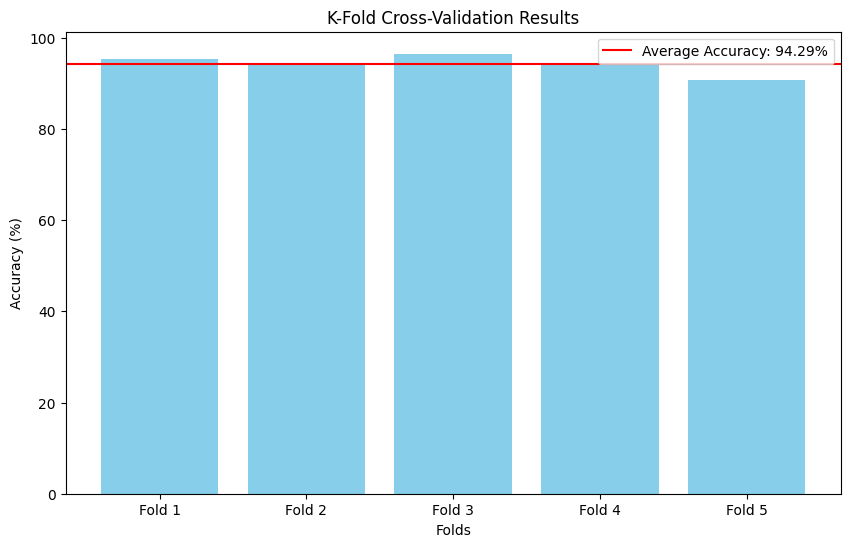

In [25]:
import matplotlib.pyplot as plt

#CVscores contains the information on how well the model preformed
# Calculate average accuracy
average_accuracy = sum(cvscores) / len(cvscores)

# Generate fold labels
folds = [f'Fold {i+1}' for i in range(len(cvscores))]

# Create bar plot
plt.figure(figsize=(10, 6))
plt.bar(folds, cvscores, color='skyblue')
plt.axhline(y=average_accuracy, color='r', linestyle='-', label=f'Average Accuracy: {average_accuracy:.2f}%')

# Add title and labels
plt.title('K-Fold Cross-Validation Results')
plt.xlabel('Folds')
plt.ylabel('Accuracy (%)')
plt.legend()

# Display the plot
plt.show()


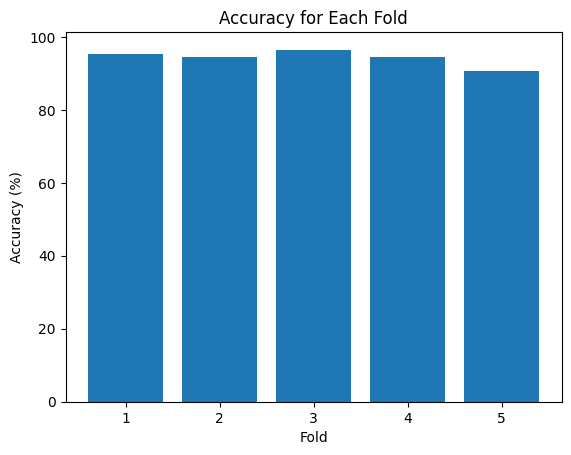

In [26]:
import matplotlib.pyplot as plt

# another bar chart for each fold
plt.bar(range(1, len(cvscores) + 1), cvscores)
plt.xlabel('Fold')
plt.ylabel('Accuracy (%)')
plt.title('Accuracy for Each Fold')
plt.show()


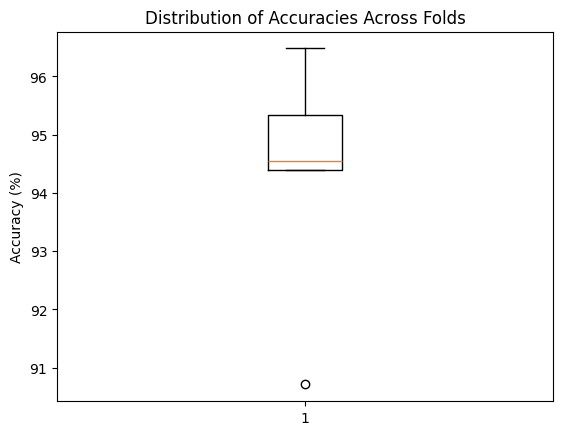

In [27]:
plt.boxplot(cvscores)
plt.title('Distribution of Accuracies Across Folds')
plt.ylabel('Accuracy (%)')
#shows the total distributions of accuracies across the folds
plt.show()
